In [16]:
import numpy as np
import oommfpy as op
import matplotlib.pyplot as plt
from pathlib import Path
import re

import matplotlib.patheffects as PathEffects

# Parameters

In [ ]:
Ms = 4.60545e5
A = 7.875e-12
# A = 6e-12
D = 0.6e-3
LD = 4 * np.pi * A / D

# Separation of tubes

In [5]:
!head ../sims/mumax3/two_tubes_separation_conical-bg_Co8Zn9Mn3/two_tubes_D_0d6e-3_A_5d7295e-12_LD_120nm.out/table.txt

# t (s)	mx ()	my ()	mz ()	E_total (J)	B_extx (T)	B_exty (T)	B_extz (T)	E_exch (J)	maxTorque (T)	SkSep (% of Lx)
0	-0.023771321	-0.43882203	0.0016494547	-2.2050205e-15	0	-0.059999935	0	-2.2231856e-15	4.275404	0.05
5.001753255220634e-10	-0.018461477	-0.4158619	0.00094879785	-4.526637e-15	0	-0.059999935	0	-3.0552114e-15	0.12597205	0.05
1.0013368708436832e-09	-0.020902293	-0.4183073	0.0006096853	-4.5510674e-15	0	-0.059999935	0	-3.062912e-15	0.027363941	0.05
1.5003153447283552e-09	-0.020954555	-0.41830677	0.00051317044	-4.5597973e-15	0	-0.059999935	0	-3.0676846e-15	0.017662903	0.05
2e-09	-0.020738084	-0.41817147	0.00044273026	-4.5634785e-15	0	-0.059999935	0	-3.070052e-15	0.013122783	0.05
2e-09	0.007861633	-0.3928176	0.001318966	-4.6096376e-15	0	-0.059999935	0	-3.1512446e-15	3.099581e-06	0.05
3.0007978479429374e-09	-0.020876024	-0.41845238	0.0006143867	-4.5466577e-15	0	-0.059999935	0	-3.0583346e-15	0.026779685	0.1
3.500479912847067e-09	-0.020688163	-0.41881102	0.00047800594	-4.5537703e-15	0	

In [101]:
ENERGY_FILE = Path('../sims/mumax3/two_tubes_separation_conical-bg_Co8Zn9Mn3/conical_D_0d6e-3_A_5d7295e-12_LD_120nm.out/table.txt')
energyd = np.loadtxt(ENERGY_FILE)

with open(ENERGY_FILE, 'r') as F:
    header = F.readline().lstrip('# ')
    # print(header)
header = re.findall(r'(?:^|(?<=[\t\)]))[a-zA-Z_\( ]+(?=\()', header)
header = [txt.rstrip() for txt in header]
print('Headers:', header)

energy_conicalbg = {}
for h, hdr in enumerate(header):
    energy_conicalbg[hdr] = energyd[:, h]
    
final_step = energy_conicalbg['maxTorque'] < 1e-5
for h, hdr in enumerate(header):
    energy_conicalbg[hdr] = energy_conicalbg[hdr][final_step]

Headers: ['t', 'mx', 'my', 'mz', 'E_total', 'B_extx', 'B_exty', 'B_extz', 'E_exch', 'maxTorque']


In [103]:
energy_conicalbg

{'t': array([2.0e-09, 4.0e-09, 6.0e-09, 8.0e-09, 1.0e-08, 1.2e-08, 1.4e-08,
        1.6e-08]),
 'mx': array([-3.0763796e-02, -1.2688616e-02, -4.9547330e-03, -1.4066792e-03,
        -4.7229585e-09, -4.6593804e-09, -2.4977185e-09, -3.6239625e-09]),
 'my': array([-0.41222095, -0.52342796, -0.62931144, -0.732401  , -0.8272125 ,
        -0.8816012 , -0.91162205, -0.9305188 ]),
 'mz': array([-1.3987224e-09,  1.7256964e-09,  1.1625744e-09,  0.0000000e+00,
         4.7228320e-04,  2.2947279e-04, -1.4234270e-07, -1.0303316e-07]),
 'E_total': array([-4.5866610e-15, -5.4908580e-15, -6.6061747e-15, -7.9237460e-15,
        -9.4335110e-15, -1.1092498e-14, -1.2829510e-14, -1.4612265e-14]),
 'B_extx': array([0., 0., 0., 0., 0., 0., 0., 0.]),
 'B_exty': array([-0.05999993, -0.07999998, -0.09999987, -0.11999987, -0.1399996 ,
        -0.15999997, -0.18000026, -0.19999972]),
 'B_extz': array([0., 0., 0., 0., 0., 0., 0., 0.]),
 'E_exch': array([-3.0990077e-15, -2.8562940e-15, -2.5447358e-15, -2.1562653e-15

In [102]:
ENERGY_FILE = Path('../sims/mumax3/two_tubes_separation_conical-bg_Co8Zn9Mn3/two_tubes_D_0d6e-3_A_5d7295e-12_LD_120nm.out/table.txt')
energyd = np.loadtxt(ENERGY_FILE)

with open(ENERGY_FILE, 'r') as F:
    header = F.readline().lstrip('# ')
    # print(header)
header = re.findall(r'(?:^|(?<=[\t\)]))[a-zA-Z_\( ]+(?=\()', header)
header = [txt.rstrip() for txt in header]
print('Headers:', header)

energy_data = {}
for h, hdr in enumerate(header):
    energy_data[hdr] = energyd[:, h]

Headers: ['t', 'mx', 'my', 'mz', 'E_total', 'B_extx', 'B_exty', 'B_extz', 'E_exch', 'maxTorque', 'SkSep']


In [82]:
# for m, maxtorque in enumerate(energy_data['maxTorque']):
#     if maxtorque < 1e-5:

sim_stops = energy_data['maxTorque'] < 1e-5
sk_seps = energy_data['SkSep'][sim_stops]
by_fields = energy_data['B_exty'][sim_stops]
energies = energy_data['E_total'][sim_stops]

In [84]:
sk_seps

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.05, 0.1 , 0.15,
       0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ,
       0.35, 0.4 , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.05,
       0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.05, 0.1 , 0.15, 0.2 ,
       0.25, 0.3 , 0.35, 0.4 , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35,
       0.4 , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ])

In [83]:
energies

array([-4.60963760e-15, -4.60951140e-15, -4.60270700e-15, -4.60967360e-15,
       -4.60966700e-15, -4.60241900e-15, -4.60749500e-15, -4.62211520e-15,
       -5.48914660e-15, -5.48111900e-15, -5.48968960e-15, -5.48330380e-15,
       -5.48366330e-15, -5.48948600e-15, -5.49668350e-15, -5.49681520e-15,
       -6.60564800e-15, -6.60577450e-15, -6.60099130e-15, -6.60082500e-15,
       -6.60042400e-15, -6.60033200e-15, -6.60642400e-15, -6.60644200e-15,
       -7.92022600e-15, -7.92026540e-15, -7.91704800e-15, -7.91674300e-15,
       -7.91638500e-15, -7.91620640e-15, -7.91490700e-15, -7.91495900e-15,
       -9.42695500e-15, -9.42687400e-15, -9.42676940e-15, -9.42816000e-15,
       -9.42793160e-15, -9.42771100e-15, -9.42706300e-15, -9.42659750e-15,
       -1.10883250e-14, -1.10879050e-14, -1.10877155e-14, -1.10870320e-14,
       -1.10861020e-14, -1.10857160e-14, -1.10852050e-14, -1.10852735e-14,
       -1.28256560e-14, -1.28249920e-14, -1.28244850e-14, -1.28241584e-14,
       -1.28225745e-14, -

In [81]:
by_fields

array([-0.05999993, -0.05999993, -0.05999993, -0.05999993, -0.05999993,
       -0.05999993, -0.05999993, -0.05999993, -0.07999998, -0.07999998,
       -0.07999998, -0.07999998, -0.07999998, -0.07999998, -0.07999998,
       -0.07999998, -0.09999986, -0.09999986, -0.09999987, -0.09999987,
       -0.09999987, -0.09999987, -0.09999987, -0.09999987, -0.11999987,
       -0.11999987, -0.11999987, -0.11999987, -0.11999987, -0.11999987,
       -0.11999987, -0.11999987, -0.1399996 , -0.1399996 , -0.1399996 ,
       -0.13999961, -0.13999961, -0.1399996 , -0.1399996 , -0.1399996 ,
       -0.15999997, -0.15999997, -0.15999997, -0.15999997, -0.15999997,
       -0.15999997, -0.15999997, -0.15999997, -0.18000026, -0.18000026,
       -0.18000026, -0.18000025, -0.18000026, -0.18000025, -0.18000026,
       -0.18000026, -0.19999973, -0.19999973, -0.19999972, -0.19999973,
       -0.19999972, -0.19999972, -0.19999973, -0.19999973])

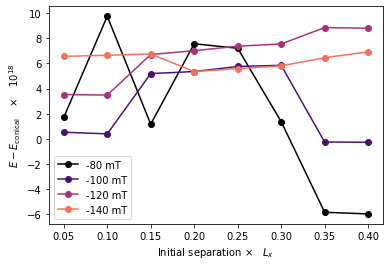

In [150]:
f, ax  = plt.subplots()

colors = plt.cm.magma(np.linspace(0, 0.7, 4))
for f, FIELD in enumerate([-0.08, -0.1, -0.12, -0.14]):
# for FIELD in [-0.12]:
    ftr = np.abs(by_fields - (FIELD)) < 1e-5
    conical_ftr = np.abs(energy_conicalbg['B_exty'] - FIELD) < 1e-5

    ax.plot(sk_seps[ftr],
            (energies[ftr] - energy_conicalbg['E_total'][conical_ftr]) * 1e18, 
            'o-', label=f'{FIELD * 1e3:.0f} mT', color=colors[f])
    
ax.legend()
ax.set_xlabel('Initial separation ' + r'$\times \quad L_{x}$')
ax.set_ylabel(r'$E - E_{\mathrm{conical}} \quad \times \quad 10^{18}$')

plt.savefig('two_tubes_separation_vs_field_energies.pdf', bbox_inches='tight')

In [108]:
import pyvista as pv

In [136]:
SNAPS_DIR = Path('two_tubes_separation_snapshots')
SNAPS_DIR.mkdir(exist_ok=True)

In [154]:
by = -140
sep = '005'

for sep in [f'{int(s):03d}' for s in range(5, 41, 5)]:
    data = op.MagnetisationData(f'../sims/mumax3/two_tubes_separation_conical-bg_Co8Zn9Mn3/'
                                f'two_tubes_D_0d6e-3_A_5d7295e-12_LD_120nm.out/m_tubeSep_{sep}_pLx_By_-{abs(by):06d}_mT.ovf')
    data.generate_coordinates()
    data.generate_field()

    grid = pv.RectilinearGrid(*(d * 1e9 for d in data.grid))

    grid.cell_arrays.update(dict(my=data.my))
    grid.cell_arrays.update(dict(mz=data.mz))
    grid.cell_arrays.update(dict(mx=data.mx))

    grid = grid.cell_data_to_point_data()
    grid.point_arrays.update(dict(m_vec=np.column_stack((grid.get_array('mx'),
                                                         grid.get_array('my'),
                                                         grid.get_array('mz')))))

    contours = grid.contour(scalars='my', isosurfaces=[0])

    # ------------------------------------------------------------------------------

    p = pv.Plotter(off_screen=False, notebook=True, window_size=[800, 400])

    # box = pyvista.Box([-0.03, 0.03, -0.03, 0.03, -0.03, 0.03])
    # p.add_mesh(box.outline(), color='black', opacity=1, line_width=0.6)

    # p.show_bounds(grid, color='black', location='outer', fmt='%.2f', font_family='arial')

    p.add_mesh(contours.smooth(n_iter=100), opacity=1, style='surface', scalars='my', clim=[-1, 1],
               cmap='RdBu', show_scalar_bar=False, 
               smooth_shading=True, # lighting=True, specular=0.6, specular_power=10, ambient=0.
               )
    p.add_mesh(grid.slice(normal='z'), opacity=1, style='surface', scalars='mz', cmap='magma', 
               show_scalar_bar=False, clim=[-1, 1], # scalar_bar_args=sargs
               )
    p.add_mesh(grid.outline(), opacity=1, style='surface', color='grey')

    arrows = contours.glyph(scale=False, factor=30, orient="m_vec",
                            tolerance=0.03, geom=pv.Arrow(tip_length=0.5, tip_radius=0.2)
                            )
    p.add_mesh(arrows, color='grey')

    light = pv.Light(position=(1, 0, -0.8), light_type='scene light', intensity=0.5)
    p.add_light(light)

    p.add_text(f'By = {by} mT\nInitial separation: {float(sep) * 1e-2} Lx', position='upper_left', 
               font_size=10, color='k', font='courier', 
               shadow=False, name=None, viewport=False)

    p.set_background('white')
    p.view_isometric()
    # p.camera.SetWindowCenter(0., -0.09)
    # p.camera.zoom(2.)
    # p.camera.SetParallelProjection(1)

    # p.camera.azimuth = -135
    # p.camera.roll = 180
    # p.camera.elevation = -30

    p.camera_position = 'xz'
    # p.camera.azimuth = 10
    p.camera.elevation = -65
    p.camera.zoom(1.6)

    p.add_axes(color='black', box=False, line_width=1)
    p.show(jupyter_backend='none', window_size=[600, 350], 
           screenshot=SNAPS_DIR / f'two_tubes_sk-sep_{sep}_pLx_By_-{abs(by):06d}_mT.png'
           )

In [159]:
Ac = 5.72957795e-12
Dc = 0.6e-3
Ms = 4.60545e5

LD = 4 * np.pi * (Ac) / (Dc)
BD = (Dc * Dc) / (Ac * Ms)
print(BD * 0.5)

0.06821467292679566
